In [3]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import tarfile
from IPython.display import display, Image
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle
import pandas as pd
import scipy.io as sc
import tensorflow as tf

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

/Users/pradyumna/anaconda3/envs/RoboND/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


In [4]:
data_root = '.'
train_folder = sc.loadmat(os.path.join(data_root,'train_32x32.mat'))
test_folder = sc.loadmat(os.path.join(data_root,'test_32x32.mat'))
extra_folder = sc.loadmat(os.path.join(data_root,'extra_32x32.mat'))

In [5]:
train_images = train_folder['X']
train_labels = train_folder['y']
test_images = test_folder['X']
test_labels = test_folder['y']
extra_images = extra_folder['X']
extra_labels = extra_folder['y']

In [6]:
def data_validation(imagedata,labels):
    if imagedata.shape[3]==len(labels):
        print("Valid Data")
    else:
        print("data invalid")
data_validation(train_images,train_labels)
data_validation(test_images,test_labels)
data_validation(extra_images,extra_labels)

Valid Data
Valid Data
Valid Data


In [7]:
test_labels.shape

(26032, 1)

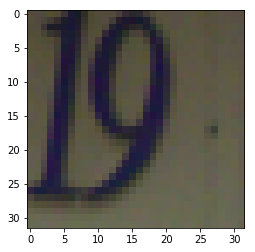

In [8]:
plt.figure()
plt.imshow(train_images[:,:,:,1])

In [9]:
train_labels

array([[1],
       [9],
       [2],
       ...,
       [1],
       [6],
       [9]], dtype=uint8)

In [10]:
image_size = 32
num_labels = 10
num_channels = 3 # grayscale

import numpy as np

def reformat(dataset, labels):
  dataset = np.transpose(dataset,(3,0,1,2))
  labels = (np.arange(num_labels) == labels).astype(np.float32)
  return dataset, labels
train_dataset, train_labels = reformat(train_images, train_labels)
valid_dataset, valid_labels = reformat(extra_images, extra_labels)
test_dataset, test_labels = reformat(test_images, test_labels)


In [11]:
train_dataset[0,:,:,:]

array([[[ 33,  30,  38],
        [ 15,  23,  19],
        [ 15,  17,  19],
        ...,
        [ 72,  65,  56],
        [ 82,  77,  57],
        [ 89,  79,  59]],

       [[ 28,  39,  35],
        [ 14,  25,  22],
        [ 14,  20,  17],
        ...,
        [ 40,  39,  50],
        [ 67,  58,  52],
        [ 83,  78,  60]],

       [[ 40,  41,  38],
        [ 18,  21,  26],
        [ 16,  17,  23],
        ...,
        [ 23,  29,  45],
        [ 35,  42,  44],
        [ 72,  69,  53]],

       ...,

       [[ 86,  81,  75],
        [ 87,  82,  71],
        [ 82,  79,  65],
        ...,
        [104, 104,  87],
        [104, 105,  81],
        [103, 105,  78]],

       [[ 84,  86,  64],
        [ 86,  79,  72],
        [ 82,  76,  72],
        ...,
        [110, 103,  84],
        [106, 105,  85],
        [106, 104,  86]],

       [[ 85,  88,  68],
        [ 89,  82,  72],
        [ 85,  79,  67],
        ...,
        [111, 104,  87],
        [109, 105,  86],
        [103, 106,  79]]

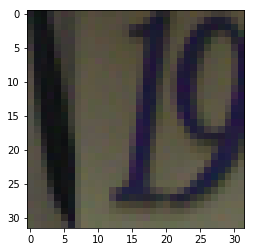

In [12]:
plt.figure()
plt.imshow(train_dataset[0,:,:,:])

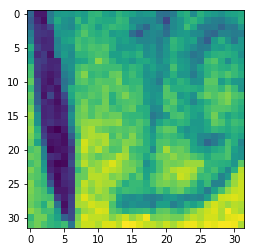

In [13]:
plt.imshow(train_dataset.astype(np.float32)[0,:,:,2])

In [14]:
def datatype(dataset):
    z = dataset.astype(np.float32)
    return z
train_dataset = datatype(train_dataset)
test_dataset = datatype(test_dataset)
valid_dataset = datatype(valid_dataset)

In [15]:
num_images = 20000
valid_dataset = valid_dataset[0:20000,:,:,:]
valid_labels = valid_labels[0:20000,:]

In [16]:
valid_dataset.shape
valid_labels.shape

(20000, 10)

In [17]:
train_dataset[0,:,:,:]

array([[[ 33.,  30.,  38.],
        [ 15.,  23.,  19.],
        [ 15.,  17.,  19.],
        ...,
        [ 72.,  65.,  56.],
        [ 82.,  77.,  57.],
        [ 89.,  79.,  59.]],

       [[ 28.,  39.,  35.],
        [ 14.,  25.,  22.],
        [ 14.,  20.,  17.],
        ...,
        [ 40.,  39.,  50.],
        [ 67.,  58.,  52.],
        [ 83.,  78.,  60.]],

       [[ 40.,  41.,  38.],
        [ 18.,  21.,  26.],
        [ 16.,  17.,  23.],
        ...,
        [ 23.,  29.,  45.],
        [ 35.,  42.,  44.],
        [ 72.,  69.,  53.]],

       ...,

       [[ 86.,  81.,  75.],
        [ 87.,  82.,  71.],
        [ 82.,  79.,  65.],
        ...,
        [104., 104.,  87.],
        [104., 105.,  81.],
        [103., 105.,  78.]],

       [[ 84.,  86.,  64.],
        [ 86.,  79.,  72.],
        [ 82.,  76.,  72.],
        ...,
        [110., 103.,  84.],
        [106., 105.,  85.],
        [106., 104.,  86.]],

       [[ 85.,  88.,  68.],
        [ 89.,  82.,  72.],
        [ 85.,  

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

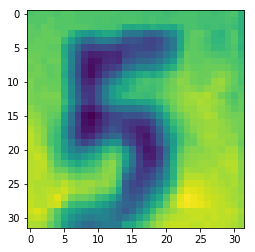

In [20]:
plt.figure()
plt.imshow(test_dataset[0,:,:,1])
test_labels[0]

In [21]:
pixel_depth = 255
def normalize(dataset):
    z = (dataset-pixel_depth/2)/pixel_depth
    return z
train_dataset = normalize(train_dataset)
test_dataset = normalize(test_dataset)
valid_dataset = normalize(valid_dataset)
        

In [20]:
test_dataset

array([[[[-0.3509804 , -0.09607843, -0.2647059 ],
         [-0.34705883, -0.09215686, -0.26078433],
         [-0.34705883, -0.09215686, -0.25686276],
         ...,
         [-0.3392157 , -0.1       , -0.26078433],
         [-0.33529413, -0.09607843, -0.25686276],
         [-0.34705883, -0.11960784, -0.2764706 ]],

        [[-0.34705883, -0.09215686, -0.26078433],
         [-0.34705883, -0.09215686, -0.26078433],
         [-0.34705883, -0.09215686, -0.25686276],
         ...,
         [-0.3392157 , -0.1       , -0.26078433],
         [-0.33137256, -0.10392157, -0.2529412 ],
         [-0.34705883, -0.11960784, -0.2764706 ]],

        [[-0.3509804 , -0.0882353 , -0.25686276],
         [-0.35490197, -0.09215686, -0.26078433],
         [-0.34705883, -0.08431373, -0.2529412 ],
         ...,
         [-0.33137256, -0.10392157, -0.2529412 ],
         [-0.33137256, -0.10784314, -0.24901961],
         [-0.34705883, -0.11960784, -0.26862746]],

        ...,

        [[-0.29607844, -0.03333334, -0

In [21]:
train_labels[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [22]:
batch_size = 512
patch_size = 5
depth1 = 48
depth2 = 96
num_hidden = 64
num_channels = 3 #RGB image

graph = tf.Graph()

with graph.as_default():

  # Input data.
  tf_train_dataset = tf.placeholder(tf.float32, shape=(batch_size, image_size, image_size, num_channels))
  tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
  tf_valid_dataset = tf.constant(valid_dataset)
  tf_test_dataset = tf.constant(test_dataset)
  global_step = tf.Variable(0)
  
  # Variables.
  layer1_weights = tf.Variable(tf.truncated_normal([patch_size, patch_size, num_channels, depth1], stddev=0.1))
  layer1_biases = tf.Variable(tf.zeros([depth1]))
  layer2_weights = tf.Variable(tf.truncated_normal([patch_size, patch_size, depth1, depth2], stddev=0.1))
  layer2_biases = tf.Variable(tf.constant(1.0, shape=[depth2]))
  layer3_weights = tf.Variable(tf.truncated_normal([image_size // 4 * image_size // 4 * depth2, num_hidden], stddev=0.1))
  layer3_biases = tf.Variable(tf.constant(1.0, shape=[num_hidden]))
  layer4_weights = tf.Variable(tf.truncated_normal([num_hidden, num_labels], stddev=0.1))
  layer4_biases = tf.Variable(tf.constant(1.0, shape=[num_labels]))
  
  # Model.
  def model(data):
    conv = tf.nn.conv2d(data, layer1_weights, [1, 1, 1, 1], padding='SAME')
    hidden = tf.nn.relu(conv + layer1_biases)
    pool = tf.nn.max_pool(hidden, [1, 2, 2, 1], [1, 2, 2, 1], padding='SAME')
    conv = tf.nn.conv2d(pool, layer2_weights, [1, 1, 1, 1], padding='SAME')
    hidden = tf.nn.relu(conv + layer2_biases)
    pool = tf.nn.max_pool(hidden, [1, 2, 2, 1], [1, 2, 2, 1], padding='SAME')
    shape = pool.get_shape().as_list()
    print(shape)
    reshape = tf.reshape(pool, [shape[0], shape[1] * shape[2] * shape[3]])
    hidden = tf.nn.relu(tf.matmul(reshape, layer3_weights) + layer3_biases)
    return tf.matmul(hidden, layer4_weights) + layer4_biases
  
  # Training computation.
  logits = model(tf_train_dataset)
  loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=tf_train_labels, logits=logits))
    
  # Optimizer.
  learning_rate = tf.train.exponential_decay(0.5, global_step, 1000, 0.65, staircase=True)
  optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)
  
  # Predictions for the training, validation, and test data.
  train_prediction = tf.nn.softmax(logits)
  print(train_prediction.shape)
  valid_prediction = tf.nn.softmax(model(tf_valid_dataset))
  test_prediction = tf.nn.softmax(model(tf_test_dataset))

[512, 8, 8, 96]
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.

(512, 10)
[20000, 8, 8, 96]
[26032, 8, 8, 96]


In [22]:
batch_size = 512
patch_size = 5
depth1 = 48
depth2 = 96
num_hidden = 64
num_channels = 3 #RGB image

graph = tf.Graph()

with graph.as_default():

  # Input data.
  tf_train_dataset = tf.placeholder(tf.float32, shape=(batch_size, image_size, image_size, num_channels))
  tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
  tf_valid_dataset = tf.constant(valid_dataset)
  tf_test_dataset = tf.constant(test_dataset)
  global_step = tf.Variable(0)
  
  # Variables.
  layer1_weights = tf.Variable(tf.truncated_normal([patch_size, patch_size, num_channels, depth1], stddev=0.1))
  layer1_biases = tf.Variable(tf.zeros([depth1]))
  layer2_weights = tf.Variable(tf.truncated_normal([patch_size, patch_size, depth1, depth2], stddev=0.1))
  layer2_biases = tf.Variable(tf.constant(1.0, shape=[depth2]))
  layer3_weights = tf.Variable(tf.truncated_normal([image_size // 4 * image_size // 4 * depth2, num_hidden], stddev=0.1))
  layer3_biases = tf.Variable(tf.constant(1.0, shape=[num_hidden]))
  layer4_weights = tf.Variable(tf.truncated_normal([num_hidden, num_labels], stddev=0.1))
  layer4_biases = tf.Variable(tf.constant(1.0, shape=[num_labels]))
  
  # Model.
  def model(data):
    conv = tf.nn.conv2d(data, layer1_weights, [1, 1, 1, 1], padding='SAME')
    hidden = tf.nn.relu(conv + layer1_biases)
    pool = tf.nn.max_pool(hidden, [1, 2, 2, 1], [1, 2, 2, 1], padding='SAME')
    conv = tf.nn.conv2d(pool, layer2_weights, [1, 1, 1, 1], padding='SAME')
    hidden = tf.nn.relu(conv + layer2_biases)
    pool = tf.nn.max_pool(hidden, [1, 2, 2, 1], [1, 2, 2, 1], padding='SAME')
    shape = pool.get_shape().as_list()
    print(shape)
    reshape = tf.reshape(pool, [shape[0], shape[1] * shape[2] * shape[3]])
    hidden = tf.nn.relu(tf.matmul(reshape, layer3_weights) + layer3_biases)
    return tf.matmul(hidden, layer4_weights) + layer4_biases
  
  # Training computation.
  logits = model(tf_train_dataset)
  loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=tf_train_labels, logits=logits))
    
  # Optimizer.
  learning_rate = tf.train.exponential_decay(0.5, global_step, 1000, 0.65, staircase=True)
  optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)
  
  # Predictions for the training, validation, and test data.
  train_prediction = tf.nn.softmax(logits)
  print(train_prediction.shape)
  valid_prediction = tf.nn.softmax(model(tf_valid_dataset))
  test_prediction = tf.nn.softmax(model(tf_test_dataset))

[512, 8, 8, 96]
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.

(512, 10)
[20000, 8, 8, 96]
[26032, 8, 8, 96]


In [24]:
#Accuracy
def accuracy(predictions, labels):
  return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
          / predictions.shape[0])

In [25]:
num_steps = 1001
with tf.Session(graph=graph) as session:
  tf.global_variables_initializer().run()
  print('Initialized')
  for step in range(num_steps):
    offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
    batch_data = train_dataset[offset:(offset + batch_size), :, :, :]
#     print(batch_data.shape)
    batch_labels = train_labels[offset:(offset + batch_size), :]
    feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
    _, l, predictions = session.run(
      [optimizer, loss, train_prediction], feed_dict=feed_dict)
    
    if (step % 50 == 0):
      print('Minibatch loss at step %d: %f' % (step, l))
      print('Minibatch accuracy: %.1f%%' % accuracy(predictions, batch_labels))
      print('Validation accuracy: %.1f%%' % accuracy(valid_prediction.eval(), valid_labels))
  print('Test accuracy: %.1f%%' % accuracy(test_prediction.eval(), test_labels))

Initialized
Minibatch loss at step 0: 1.000000
Minibatch accuracy: 14.8%
Validation accuracy: 6.2%
Minibatch loss at step 50: 1.000000
Minibatch accuracy: 17.4%
Validation accuracy: 17.5%
Minibatch loss at step 100: 1.000000
Minibatch accuracy: 20.7%
Validation accuracy: 17.5%
Minibatch loss at step 150: 1.000000
Minibatch accuracy: 21.3%
Validation accuracy: 17.5%
Minibatch loss at step 200: 1.000000
Minibatch accuracy: 17.4%
Validation accuracy: 17.5%
Minibatch loss at step 250: 1.000000
Minibatch accuracy: 16.8%
Validation accuracy: 17.5%
Minibatch loss at step 300: 1.000000
Minibatch accuracy: 18.4%


KeyboardInterrupt: 